<a href="https://colab.research.google.com/github/mateuszxx89/computere-vision-course/blob/main/01_omr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip -q install --upgrade opencv-python

In [4]:
from google.colab.patches import cv2_imshow
import imutils
from imutils import contours
import numpy as np
import cv2
cv2.__version__

'4.10.0'

In [5]:
ANSWER_KEY = {0: 1, 1: 3, 2: 0, 3: 2, 4: 1, 5: 3, 6: 4, 7: 1, 8: 3, 9: 0}

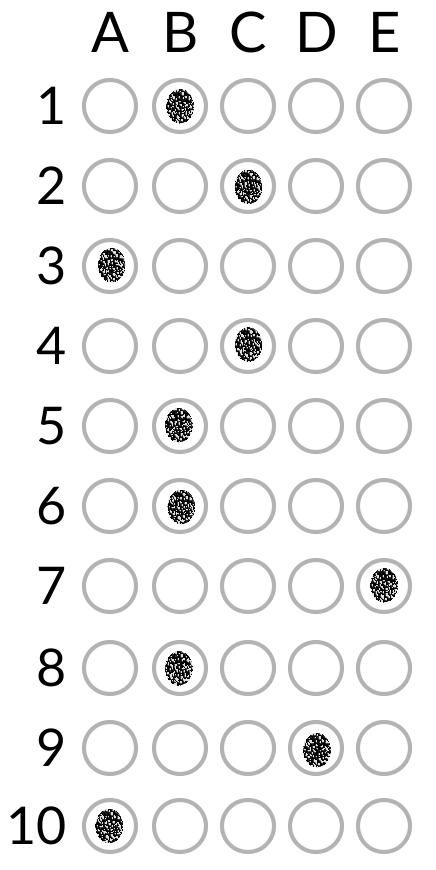

In [9]:
image = cv2.imread('answers_1.png')
cv2_imshow(image)

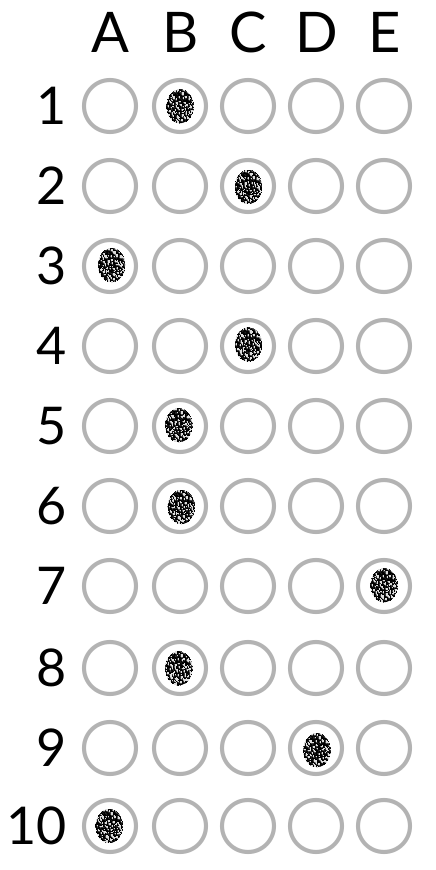

In [10]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

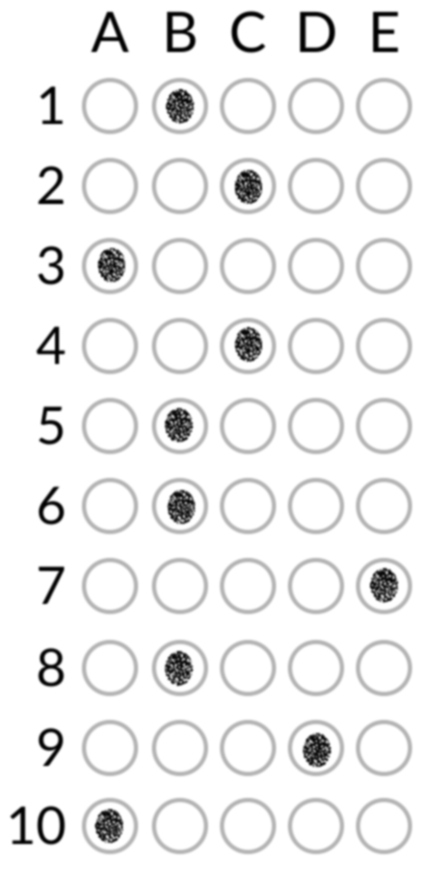

In [11]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
cv2_imshow(blurred)

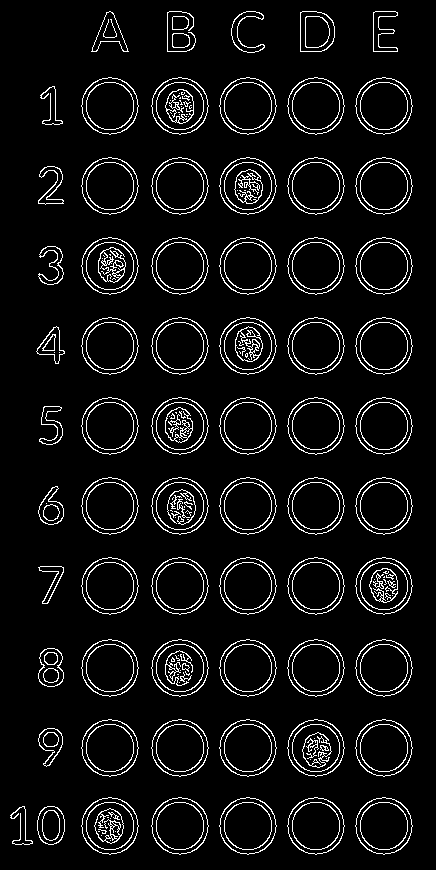

In [13]:
thresh = cv2.Canny(blurred, 70, 70)
cv2_imshow(edges)

In [14]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
len(cnts)

68

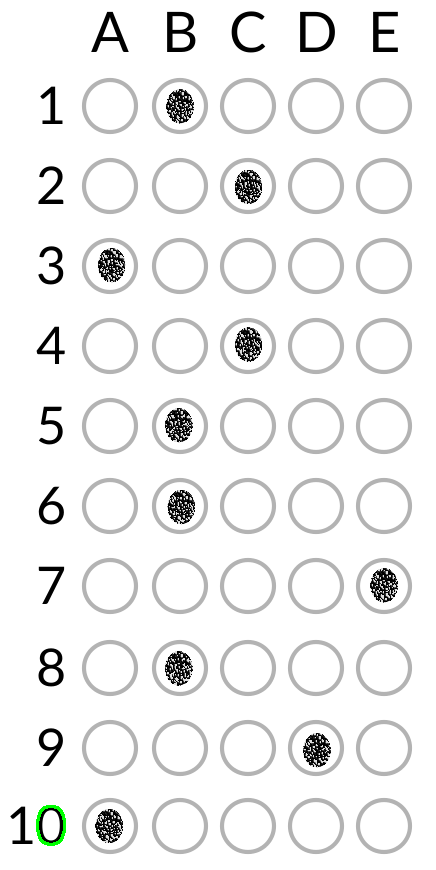

In [17]:
cnt1 = cv2.drawContours(image.copy(), [cnts[0]], -1, (0, 255, 0), 2)
cv2_imshow(cnt1)

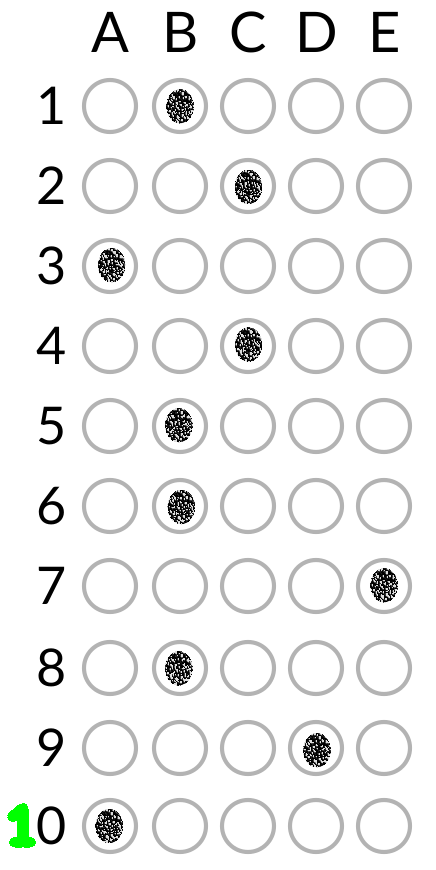

In [18]:
cnt2 = cv2.drawContours(image.copy(), [cnts[1]], -1, (0, 255, 0), 5)
cv2_imshow(cnt2)

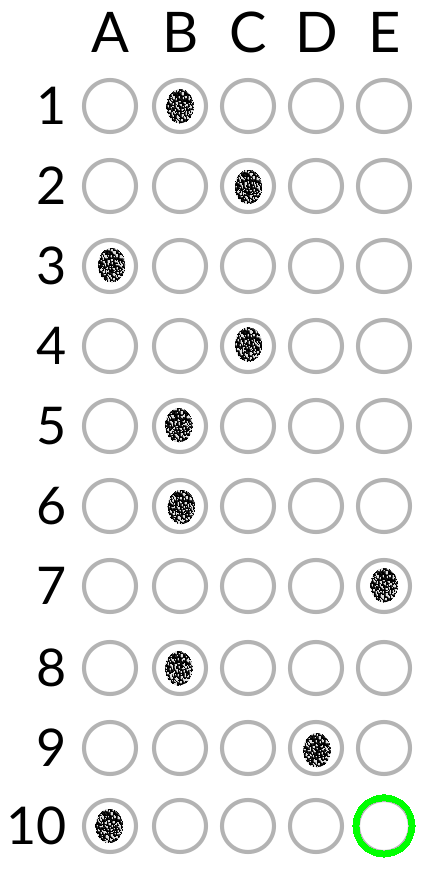

In [19]:
cnt3 = cv2.drawContours(image.copy(), [cnts[2]], -1, (0, 255, 0), 5)
cv2_imshow(cnt3)

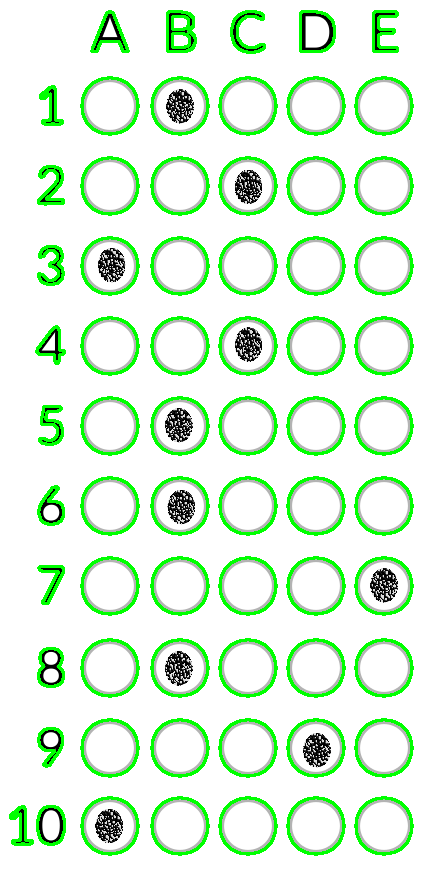

In [20]:
cnt_img = image.copy()
for contour in cnts:
  cv2.drawContours(cnt_img, [contour], contourIdx=-1, color=(0, 255, 0), thickness=2)
cv2_imshow(cnt_img)

Liczba pol z odpowiedziami: 50


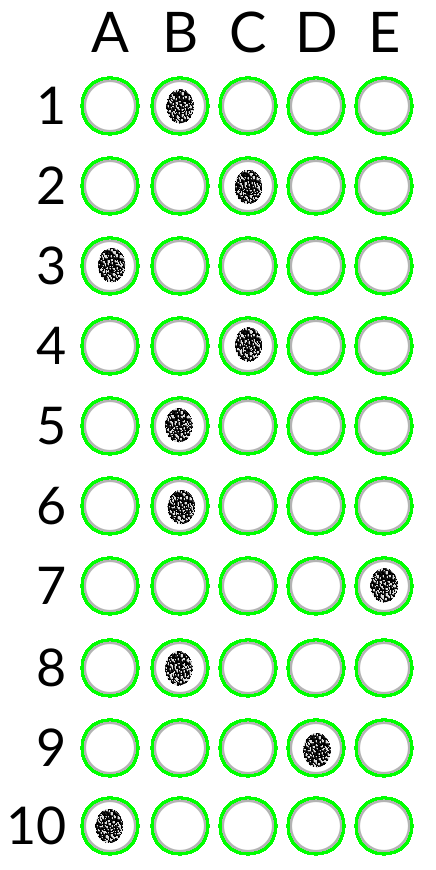

In [22]:
quesion_contours = []

for contour in cnts:
  (x, y, w, h) = cv2.boundingRect(contour)
  ar = w / float(h)

  if w >= 50 and h >= 50 and ar >= 0.9 and ar <=1.1:
    quesion_contours.append(contour)

print(f'Liczba pol z odpowiedziami: {len(quesion_contours)}')

cnt_img = image.copy()
for contour in quesion_contours:
    cv2.drawContours(cnt_img, [contour], contourIdx=-1, color=(0, 255, 0), thickness=2)
cv2_imshow(cnt_img)

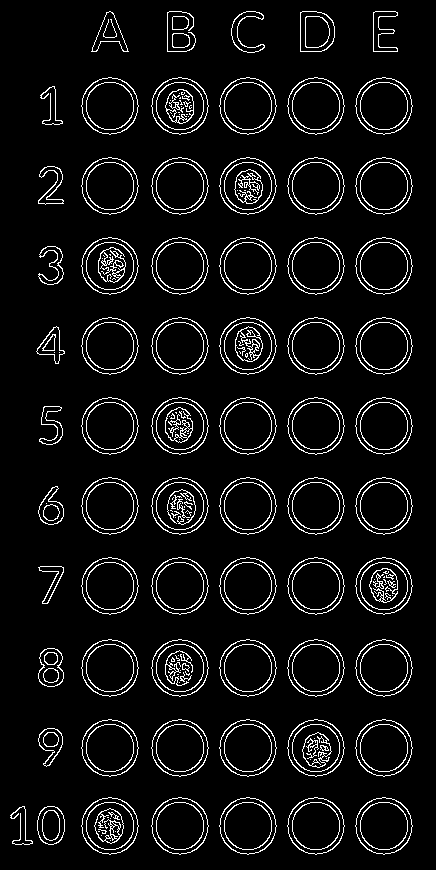

In [23]:
cv2_imshow(thresh)

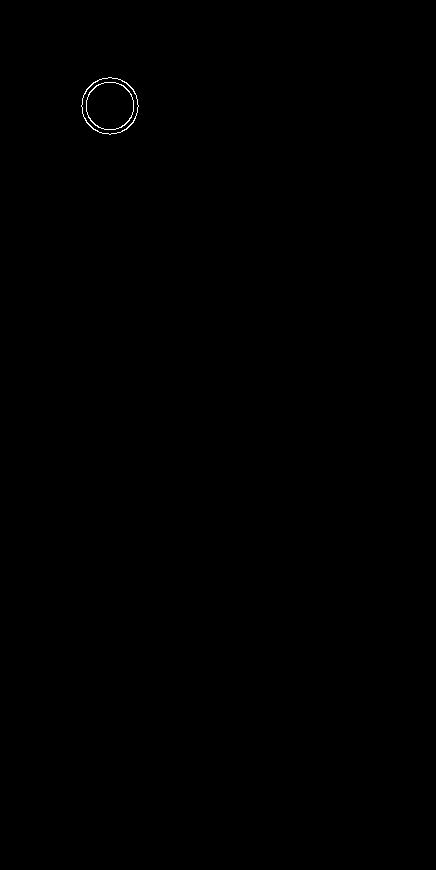

(375, 0)
1


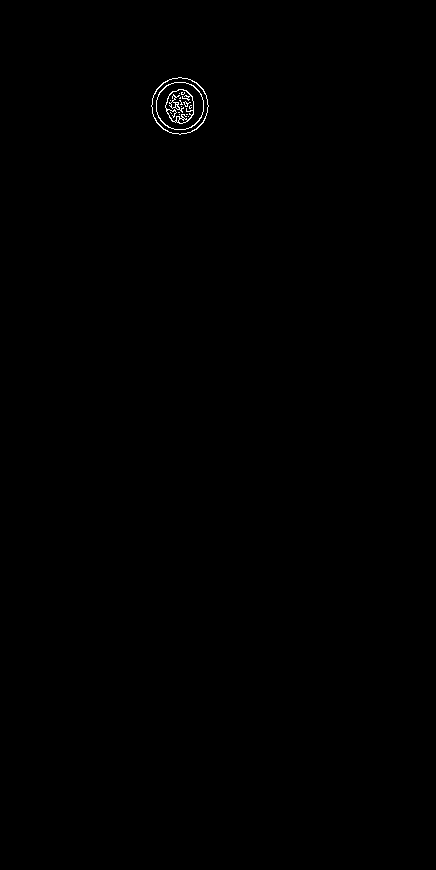

(702, 1)
1


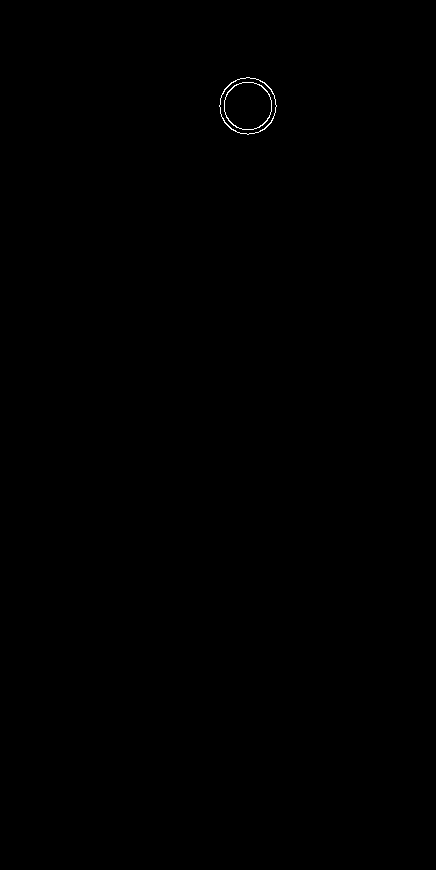

(702, 1)
1


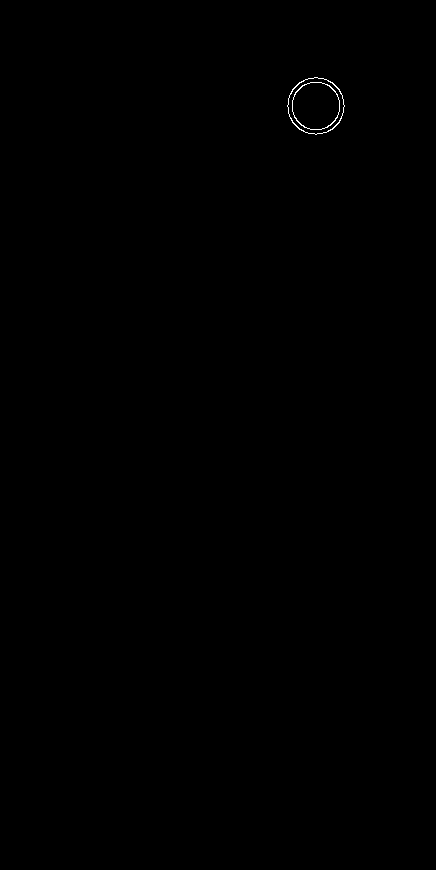

(702, 1)
1


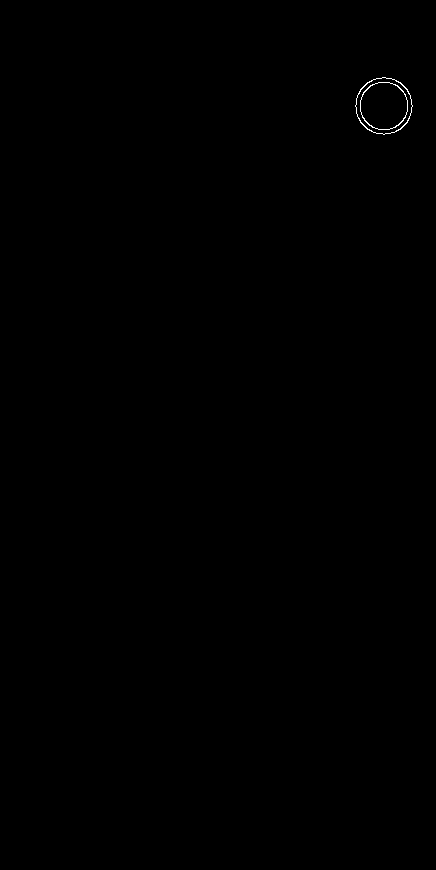

(702, 1)
1


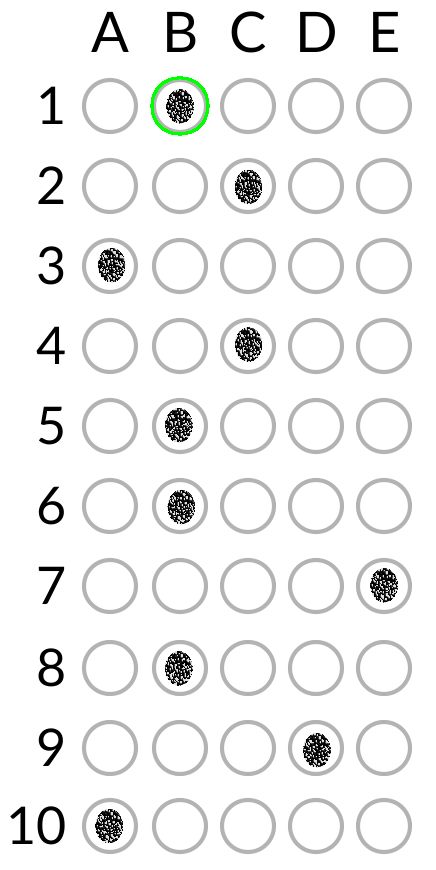

In [27]:
question_top_bottom = imutils.contours.sort_contours(quesion_contours, method='top-to-bottom')[0]

first_5 = question_top_bottom[:5]
first_5_left_right = imutils.contours.sort_contours(first_5, method='left-to-right')[0]

img = image.copy()

marked = None
for idx, contour in enumerate(first_5_left_right):
  mask = np.zeros(thresh.shape, dtype='uint8')
  cv2.drawContours(mask, [contour], contourIdx=-1, color=255, thickness=-1)
  mask = cv2.bitwise_and(thresh, thresh, mask=mask)
  cv2_imshow(mask)
  total = cv2.countNonZero(mask)

  if marked is None or total > marked[0]:
    marked = (total, idx)
  print(marked)

  color = (0, 0, 255)
  key = ANSWER_KEY[0]
  print(key)

  if key == marked[1]:
    color = (0, 255, 0)

cv2.drawContours(img, [first_5_left_right[key]], -1, color, 2)
cv2_imshow(img)


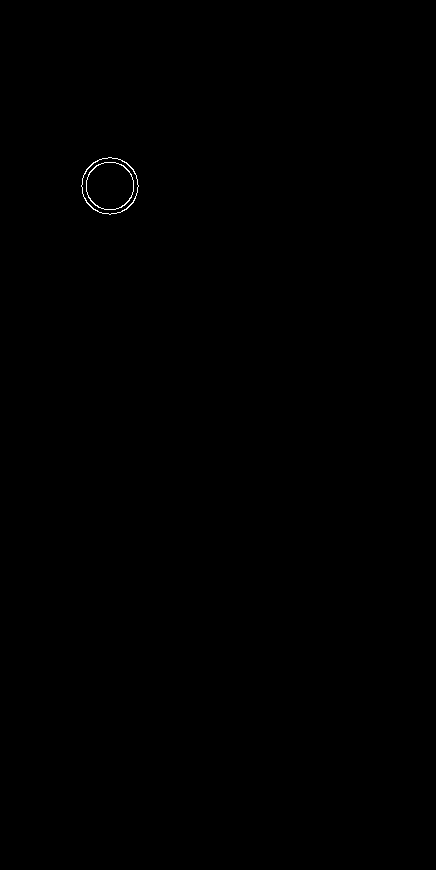

(375, 0)
3


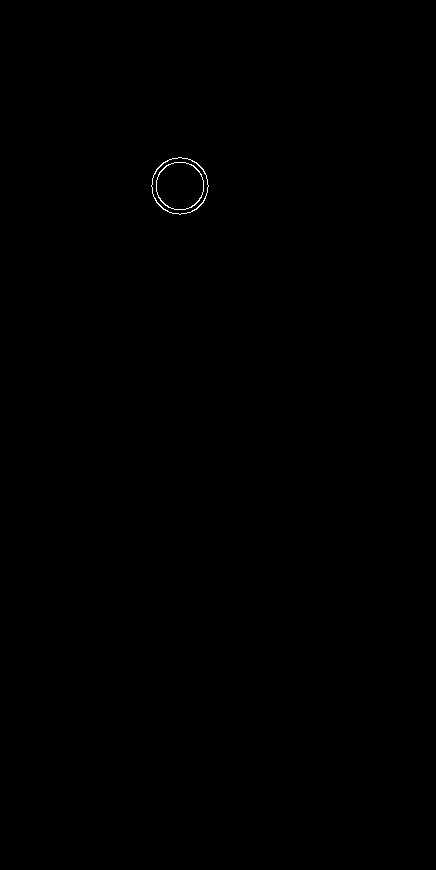

(375, 0)
3


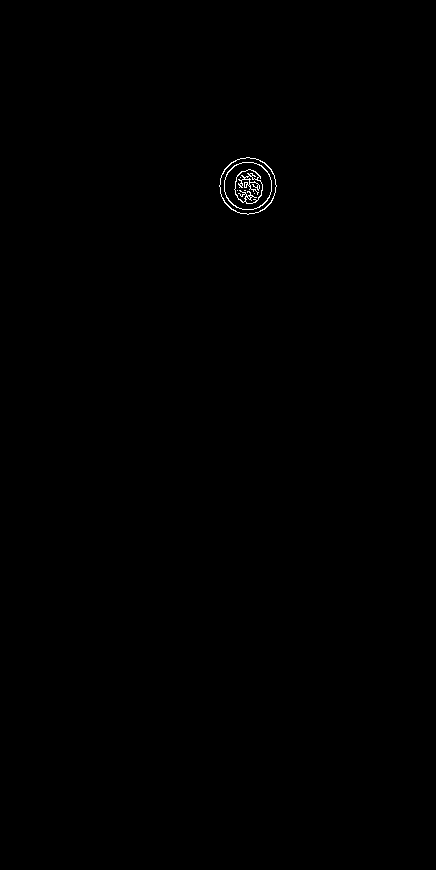

(696, 2)
3


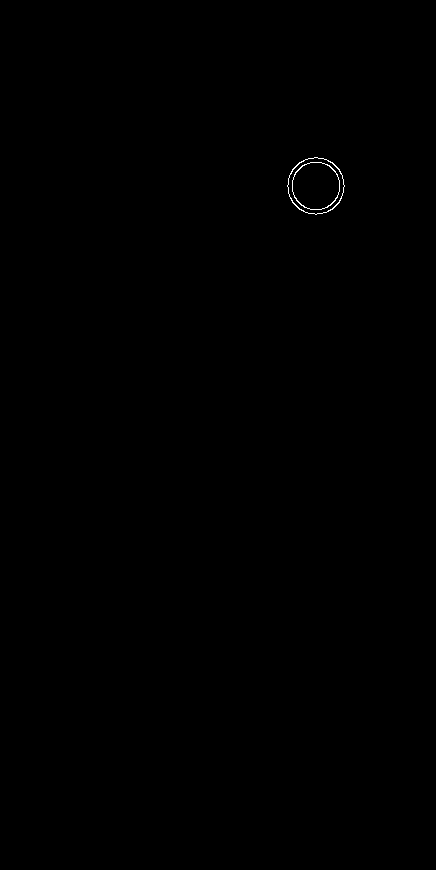

(696, 2)
3


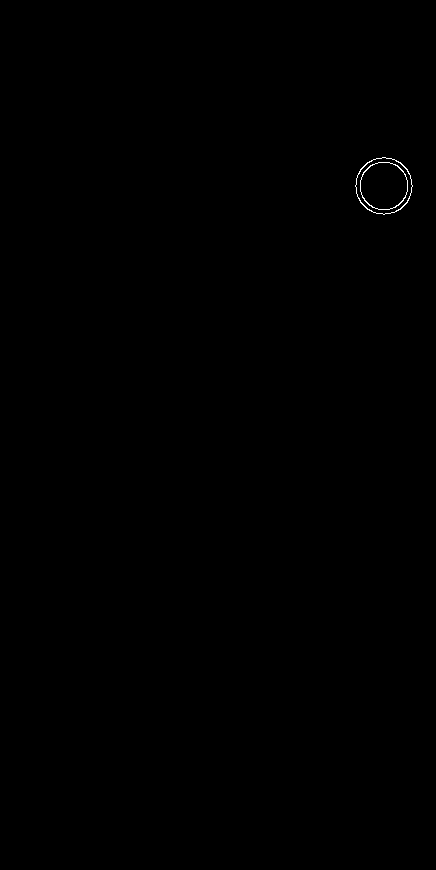

(696, 2)
3


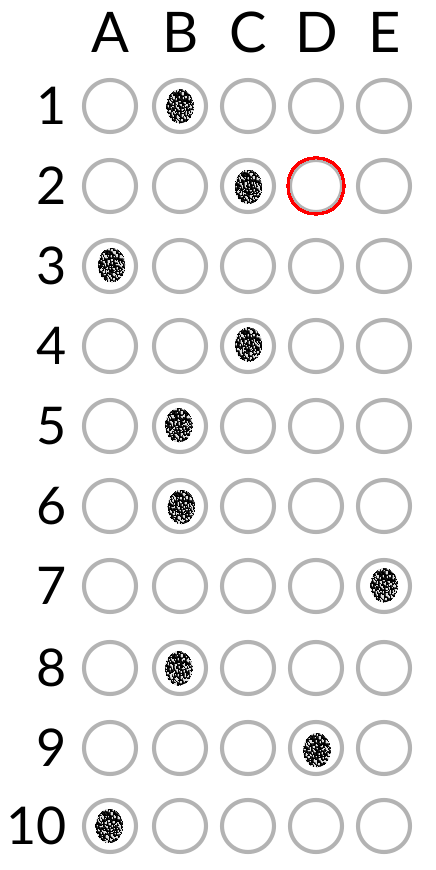

In [28]:
question_top_bottom = imutils.contours.sort_contours(quesion_contours, method='top-to-bottom')[0]

first_5 = question_top_bottom[5:10]
first_5_left_right = imutils.contours.sort_contours(first_5, method='left-to-right')[0]

img = image.copy()

marked = None
for idx, contour in enumerate(first_5_left_right):
  mask = np.zeros(thresh.shape, dtype='uint8')
  cv2.drawContours(mask, [contour], contourIdx=-1, color=255, thickness=-1)
  mask = cv2.bitwise_and(thresh, thresh, mask=mask)
  cv2_imshow(mask)
  total = cv2.countNonZero(mask)

  if marked is None or total > marked[0]:
    marked = (total, idx)
  print(marked)

  color = (0, 0, 255)
  key = ANSWER_KEY[1]
  print(key)

  if key == marked[1]:
    color = (0, 255, 0)

cv2.drawContours(img, [first_5_left_right[key]], -1, color, 2)
cv2_imshow(img)


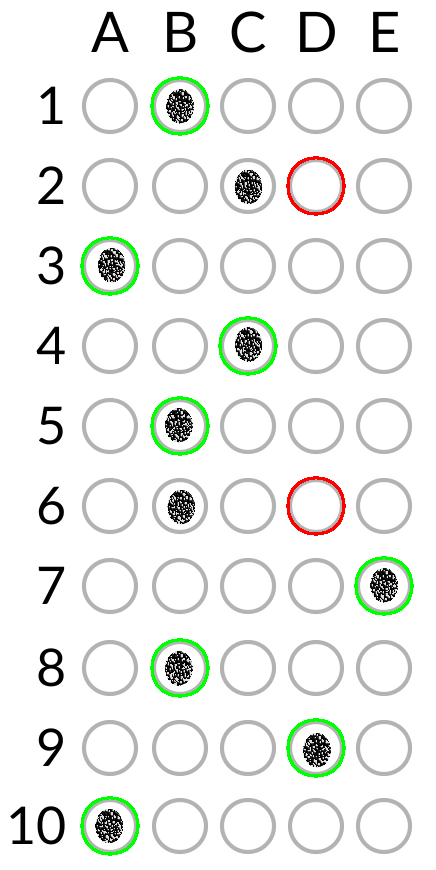

In [29]:
img = image.copy()

correct = 0

question_top_bottom = imutils.contours.sort_contours(quesion_contours, method='top-to-bottom')[0]

for question, idx in enumerate(range(0, len(question_top_bottom), 5)):
  fields = question_top_bottom[idx:idx + 5]
  fields = imutils.contours.sort_contours(fields, method='left-to-right')[0]

  marked = None
  for cnt_idx, contour in enumerate(fields):
    mask = np.zeros(thresh.shape, dtype='uint8')
    cv2.drawContours(mask, [contour], -1, 255, -1)
    mask = cv2.bitwise_and(thresh, thresh, mask=mask)
    total = cv2.countNonZero(mask)

    if marked is None or total > marked[0]:
      marked = (total, cnt_idx)
  color = (0, 0 , 255)
  key = ANSWER_KEY[question]

  if key == marked[1]:
    color = (0, 255, 0)
    correct += 1

  cv2.drawContours(img, [fields[key]], -1, color, 2)
cv2_imshow(img)
